In [1]:
import numpy as np
import time
from INST_6050A import INST_6050A
from INST_6626A import INST_6626A

load = INST_6050A(22)
print ("Electronic Load: " + load.identify())
psu = INST_6626A(3)
print ("Supply: " + psu.identify())

load.disable(1)
psu.disable(3)

Electronic Load: HEWLETT-PACKARD,6050A,0,A.01.01

Supply: HP6626A



In [2]:
minV = 15
maxV = 35
stepV = 20

minI = 0.05
maxI = 2
stepI = 0.05

print("Load testing from {:0.4f}A to {:0.4f}A in {:0.4f}A steps...".format(minI, maxI, stepI))
print("and {:0.4f}V to {:0.4f}V in {:0.4f}V steps...".format(minV, maxV, stepV))
print("")

tests = []
for V in np.arange(minV, maxV+stepV, stepV):
    print("V={:0.4f}".format(V))
    print("I\tPin\tPout\tEff")
    psu.setCurrent(4,2)
    psu.setVoltage(4,V)
    psu.enable(4)
    load.set(3,"CC",0)
    load.enable(3)
    Pins = []
    Pouts = []
    Effs = []
    Is = []
    for I in np.arange(minI, maxI+stepI, stepI):
        load.set(3,"CC",I)
        time.sleep(1)
        Pin = psu.getPower(4)
        Pout = load.getPower(3)
        Eff = Pout/Pin
        Im=load.getCurrent(3)
        print("{:0.4f}\t{:0.4f}\t{:0.4f}\t{:0.4f}".format(Im,Pin,Pout,Eff))
        Pins.append(Pin)
        Pouts.append(Pout)
        Is.append(Im)
        Effs.append(Eff)
    load.disable(3)
    tests.append([V,Is,Pins,Pout,Effs])


Load testing from 0.0500A to 2.0000A in 0.0500A steps...
and 15.0000V to 35.0000V in 20.0000V steps...

V=15.0000
I	Pin	Pout	Eff
0.0520	0.4379	0.2673	0.6104
0.0990	0.7336	0.5089	0.6937
0.1510	1.0468	0.7761	0.7414
0.2000	1.3648	1.0280	0.7532
0.2500	1.6627	1.2850	0.7728
0.2990	1.9726	1.5369	0.7791
0.3490	2.2512	1.7939	0.7969
0.3980	2.5508	2.0457	0.8020
0.4510	2.8384	2.3181	0.8167
0.5000	3.1037	2.5700	0.8281
0.5500	3.3422	2.7885	0.8343
0.5990	3.6045	3.0369	0.8425
0.6490	3.8700	3.2904	0.8502
0.7010	4.1340	3.5541	0.8597
0.7480	4.3827	3.7924	0.8653
0.8000	4.6497	4.0560	0.8723
0.8500	4.9155	4.3095	0.8767
0.8990	5.1822	4.5579	0.8795
0.9460	5.4341	4.8114	0.8854
0.9980	5.7015	5.0599	0.8875
1.0480	5.9730	5.3134	0.8896
1.1000	6.2404	5.5770	0.8937
1.1470	6.4961	5.7350	0.8828
1.1990	6.7680	5.9800	0.8836
1.2490	7.0420	6.2450	0.8868
1.2980	7.3120	6.4900	0.8876
1.3480	7.5825	6.7400	0.8889
1.3970	7.8415	6.9850	0.8908
1.4470	8.1120	7.2350	0.8919
1.4990	8.3865	7.4950	0.8937
1.5490	8.6589	7.7450	0.8945
1.5

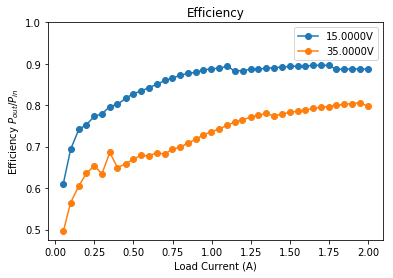

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
for t in tests:
    plt.plot(t[1],t[4], '-o', label='{:.4f}V'.format(t[0]))    
plt.legend()
plt.title('Efficiency')
plt.xlabel('Load Current (A)')
plt.ylabel('Efficiency $P_{out}$/$P_{in}$')
plt.ylim(top=1)
plt.show()